In [36]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import cv2
import base64
from PIL import Image
import os
import imghdr

# Load Folder

In [37]:
data_path = './Data/'

In [38]:
dataset = []
for path in glob.iglob(os.path.join(data_path, "**", "*.jpg")):
    person = path.split("\\")[-2]
    dataset.append({"person":person, "path": path})
    
dataset = pd.DataFrame(dataset)
dataset.head(10)

,person,path
0,Aaron_Eckhart,./Data\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
1,Aaron_Guiel,./Data\Aaron_Guiel\Aaron_Guiel_0001.jpg
2,Aaron_Patterson,./Data\Aaron_Patterson\Aaron_Patterson_0001.jpg
3,Aaron_Peirsol,./Data\Aaron_Peirsol\Aaron_Peirsol_0001.jpg
4,Aaron_Peirsol,./Data\Aaron_Peirsol\Aaron_Peirsol_0002.jpg
5,Aaron_Peirsol,./Data\Aaron_Peirsol\Aaron_Peirsol_0003.jpg
6,Aaron_Peirsol,./Data\Aaron_Peirsol\Aaron_Peirsol_0004.jpg
7,Aaron_Pena,./Data\Aaron_Pena\Aaron_Pena_0001.jpg
8,Aaron_Sorkin,./Data\Aaron_Sorkin\Aaron_Sorkin_0001.jpg
9,Aaron_Sorkin,./Data\Aaron_Sorkin\Aaron_Sorkin_0002.jpg


In [39]:
num_folders = sum(os.path.isdir(os.path.join(data_path, f)) for f in os.listdir(data_path))

print(f"Number of folders in the data path: {num_folders}")

Number of folders in the data path: 5749


# Data Visualization

In [40]:
dataset.shape

(13233, 2)

In [41]:
dataset['person'].count()

13233

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  13233 non-null  object
 1   path    13233 non-null  object
dtypes: object(2)
memory usage: 206.9+ KB


In [43]:
dataset.describe(include='all')

,person,path
count,13233,13233
unique,5749,13233
top,George_W_Bush,./Data\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
freq,530,1


In [44]:
from PIL import Image

# check image size
def check_image_size(image_path):
    with Image.open(image_path) as img:
        size = img.size
        return size != (250, 250)

# filter images that don't have a size of 250x250
images_not_250x250 = dataset[dataset['path'].apply(check_image_size)]

# count the number of images that don't have size 250x250
count_not_250x250 = len(images_not_250x250)

print(f"Number of images not sized 250x250: {count_not_250x250}")


Number of images not sized 250x250: 0


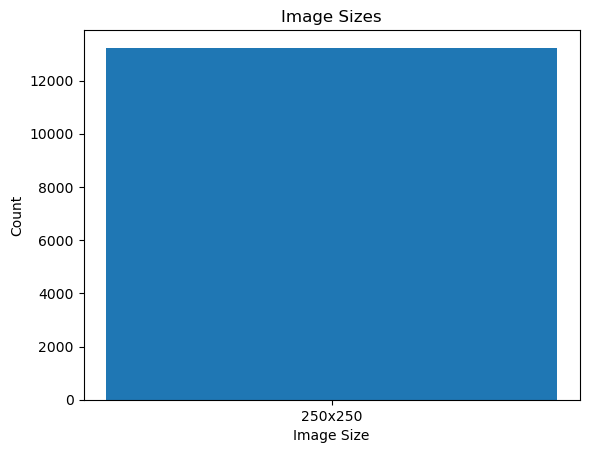

In [45]:
image_sizes = []  # List to store image sizes

for file in dataset['path']:
    image = cv2.imread(file)
    if image is not None:  # Check if the image was successfully loaded
        size = image.shape[:2]  # Get the dimensions (height, width)
        image_sizes.append(size)

# Count the occurrences of each unique image size
size_counts = {}
for size in image_sizes:
    if size in size_counts:
        size_counts[size] += 1
    else:
        size_counts[size] = 1

# Extract the dimensions and counts for plotting
dimensions = [f"{size[0]}x{size[1]}" for size in size_counts.keys()]
counts = size_counts.values()

# Plot the bar graph
plt.bar(dimensions, counts)
plt.xlabel('Image Size')
plt.ylabel('Count')
plt.title('Image Sizes')
plt.show()

In [46]:
# Dictionary to store the image count per folder
image_count_per_folder = {}

for person_folder in os.listdir(data_path):
    person_path = os.path.join(data_path, person_folder)
    if os.path.isdir(person_path):
        images = [f for f in os.listdir(person_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        image_count_per_folder[person_folder] = len(images)

# Calculate average images per folder
average_images_per_folder = sum(image_count_per_folder.values()) / len(image_count_per_folder)

# Find the folder with the most and least images
most_images_folder = max(image_count_per_folder, key=image_count_per_folder.get)
least_images_folder = min(image_count_per_folder, key=image_count_per_folder.get)

# counts
most_images_count = image_count_per_folder[most_images_folder]
least_images_count = image_count_per_folder[least_images_folder]

print(f"Average images per folder: {average_images_per_folder}")
print(f"Folder with the most images: {most_images_folder}, Count: {most_images_count}")
print(f"Folder with the least images: {least_images_folder}, Count: {least_images_count}")


Average images per folder: 2.301791615933206
Folder with the most images: George_W_Bush, Count: 530
Folder with the least images: Aaron_Eckhart, Count: 1


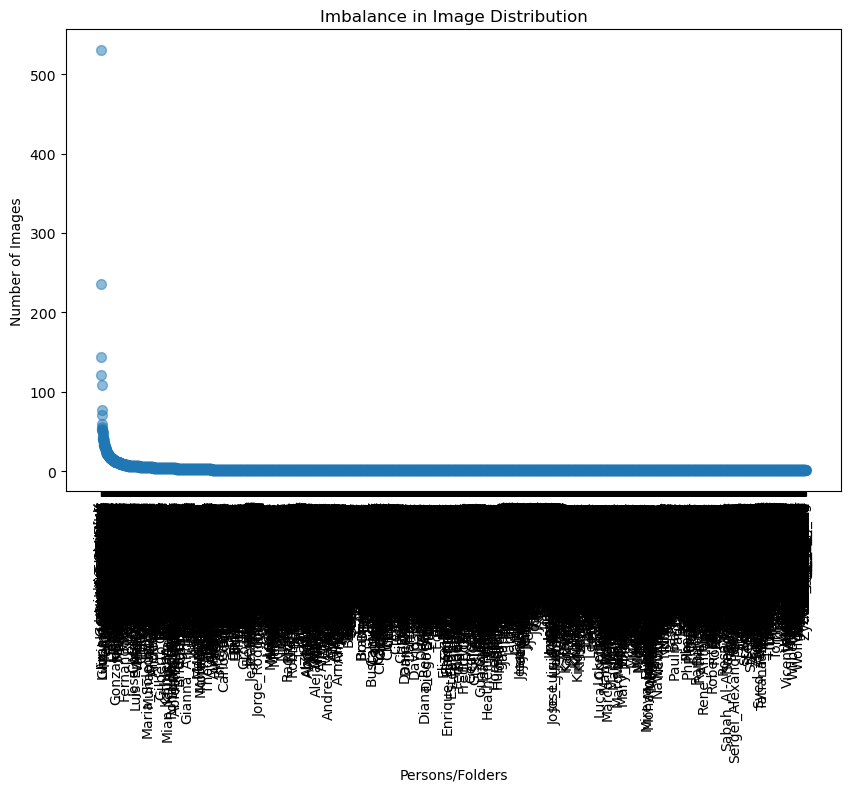

In [47]:

# Sort the dictionary by image count (descending) to focus on the most imbalanced instances
sorted_counts = {k: v for k, v in sorted(image_count_per_folder.items(), key=lambda item: item[1], reverse=True)}

persons = list(sorted_counts.keys())
image_counts = list(sorted_counts.values())

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(persons, image_counts, marker='o', s=50, alpha=0.5)
plt.xlabel('Persons/Folders')
plt.ylabel('Number of Images')
plt.title('Imbalance in Image Distribution')
plt.xticks(rotation=90) 
plt.show()


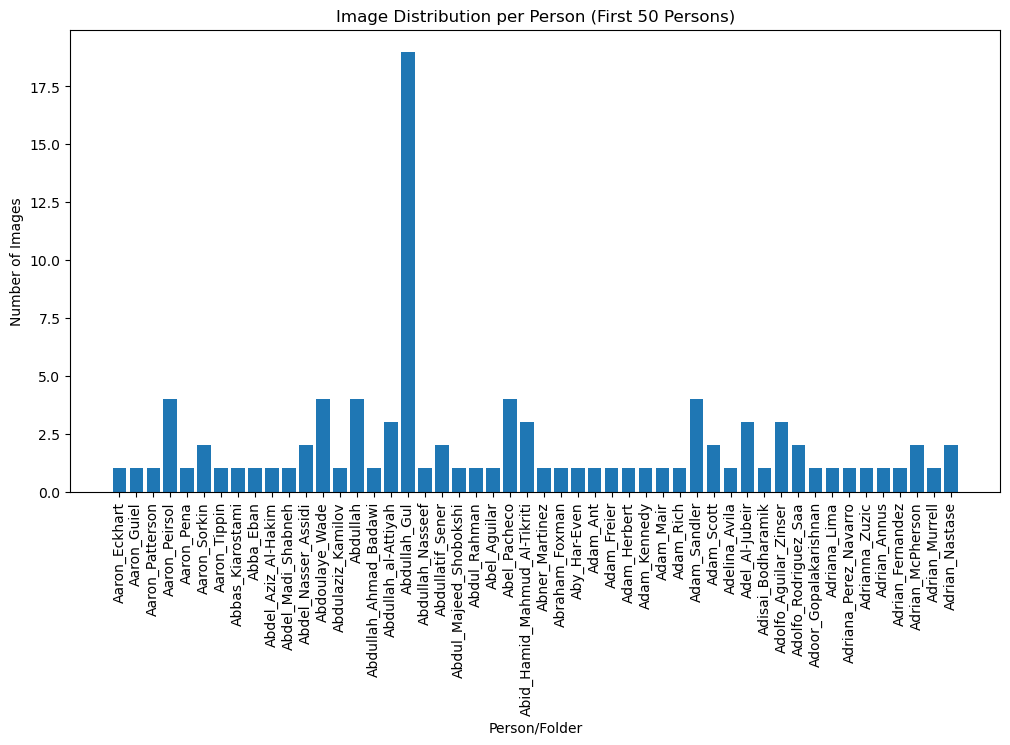

In [48]:

first_50_persons = list(image_count_per_folder.keys())[:50]
count_images = [image_count_per_folder[person] for person in first_50_persons]

plt.figure(figsize=(12, 6))
plt.bar(first_50_persons, count_images)
plt.xlabel('Person/Folder')
plt.ylabel('Number of Images')
plt.title('Image Distribution per Person (First 50 Persons)')
plt.xticks(rotation=90)  
plt.show()


In [49]:
# Count Folders that have Image less than 3
folders_under_3_images = {k: v for k, v in image_count_per_folder.items() if v < 3}
count_folders_under_3 = len(folders_under_3_images)
print(f"Number of persons/folders with less than 3 images: {count_folders_under_3}")

# Count Folders that have one Image
folders_have_1_images = {k: v for k, v in image_count_per_folder.items() if v == 1}
count_folders_have_1 = len(folders_have_1_images)
print(f"Number of persons/folders have one images: {count_folders_have_1}")

Number of persons/folders with less than 3 images: 4848
Number of persons/folders have one images: 4069


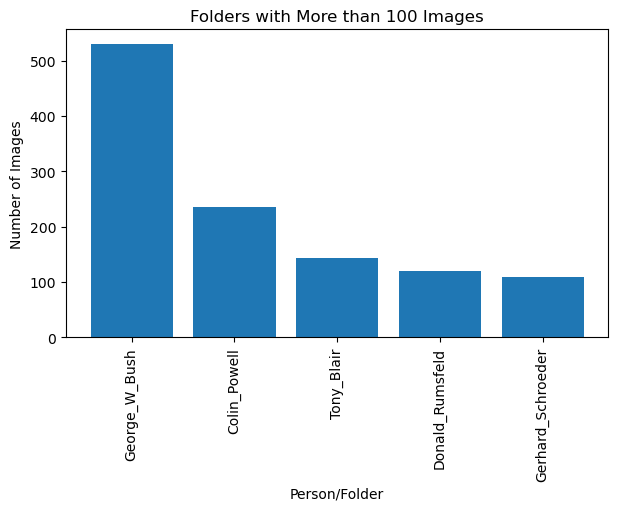

In [50]:
# Filter folders with more than 100 images
folders_over_100_images = {k: v for k, v in image_count_per_folder.items() if v > 100}

# Sort the folders based on image count
sorted_folders = {k: v for k, v in sorted(folders_over_100_images.items(), key=lambda item: item[1], reverse=True)}

folder_names = list(sorted_folders.keys())
image_counts = list(sorted_folders.values())

plt.figure(figsize=(7, 4))
plt.bar(folder_names, image_counts)
plt.xlabel('Person/Folder')
plt.ylabel('Number of Images')
plt.title('Folders with More than 100 Images')
plt.xticks(rotation=90)
plt.show()


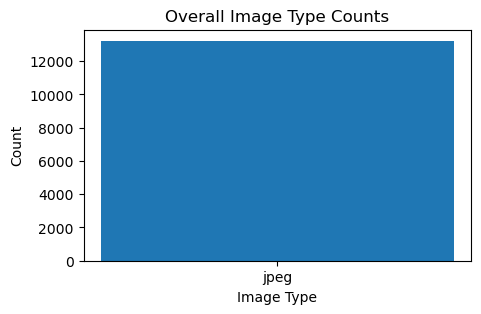

In [51]:
image_types = {}

for root, dirs, files in os.walk(data_path):
    for file in files:
        file_path = os.path.join(root, file)
        if os.path.isfile(file_path):  # Check if it's a file (not a directory)
            image_type = imghdr.what(file_path)  # Get the image type
            if image_type is not None:
                if image_type not in image_types:
                    image_types[image_type] = 1
                else:
                    image_types[image_type] += 1

# Plotting the image types for each subfolder
labels = list(image_types.keys())
counts = list(image_types.values())

plt.figure(figsize=(5, 3))
plt.bar(labels, counts)
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Overall Image Type Counts')
plt.show()

<Axes: xlabel='person'>

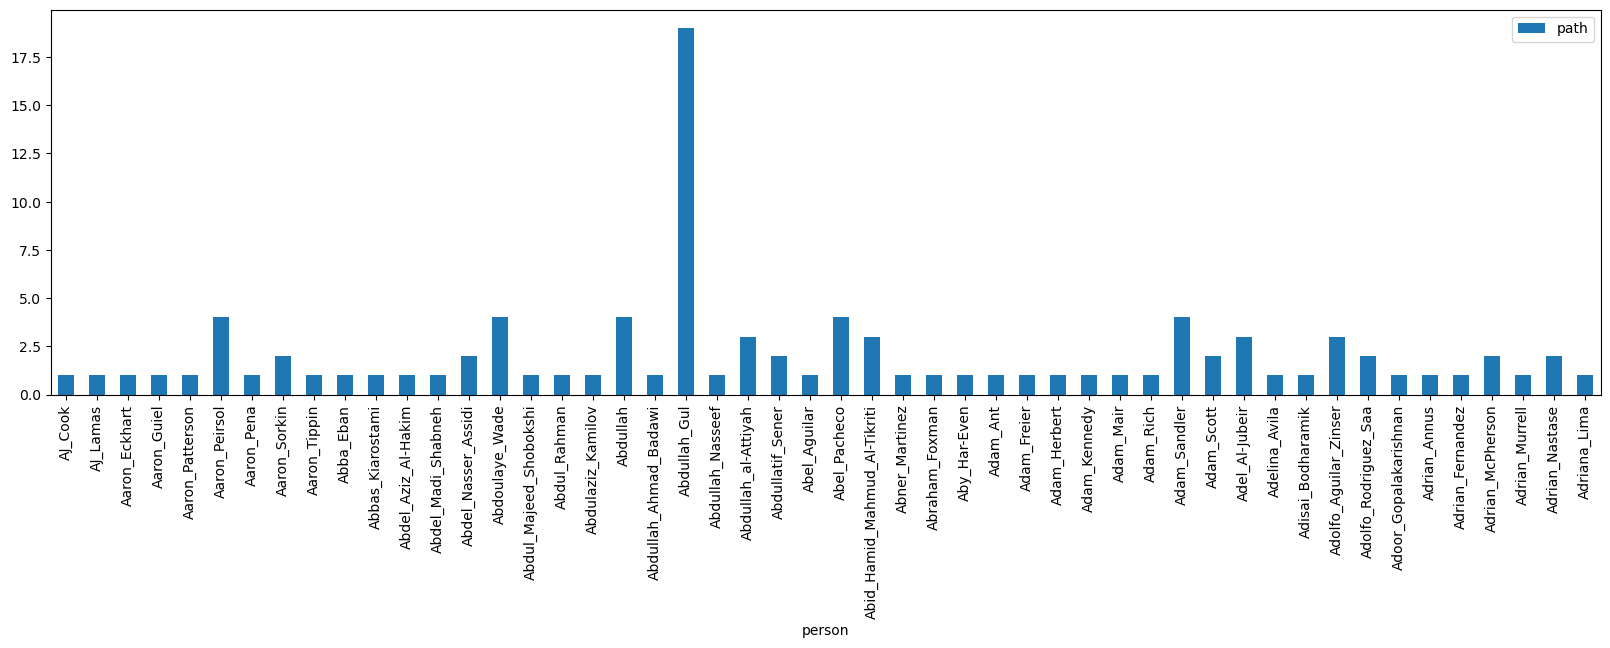

In [52]:
dataset.groupby("person").count()[:50].plot(kind='bar', figsize=(20,5))

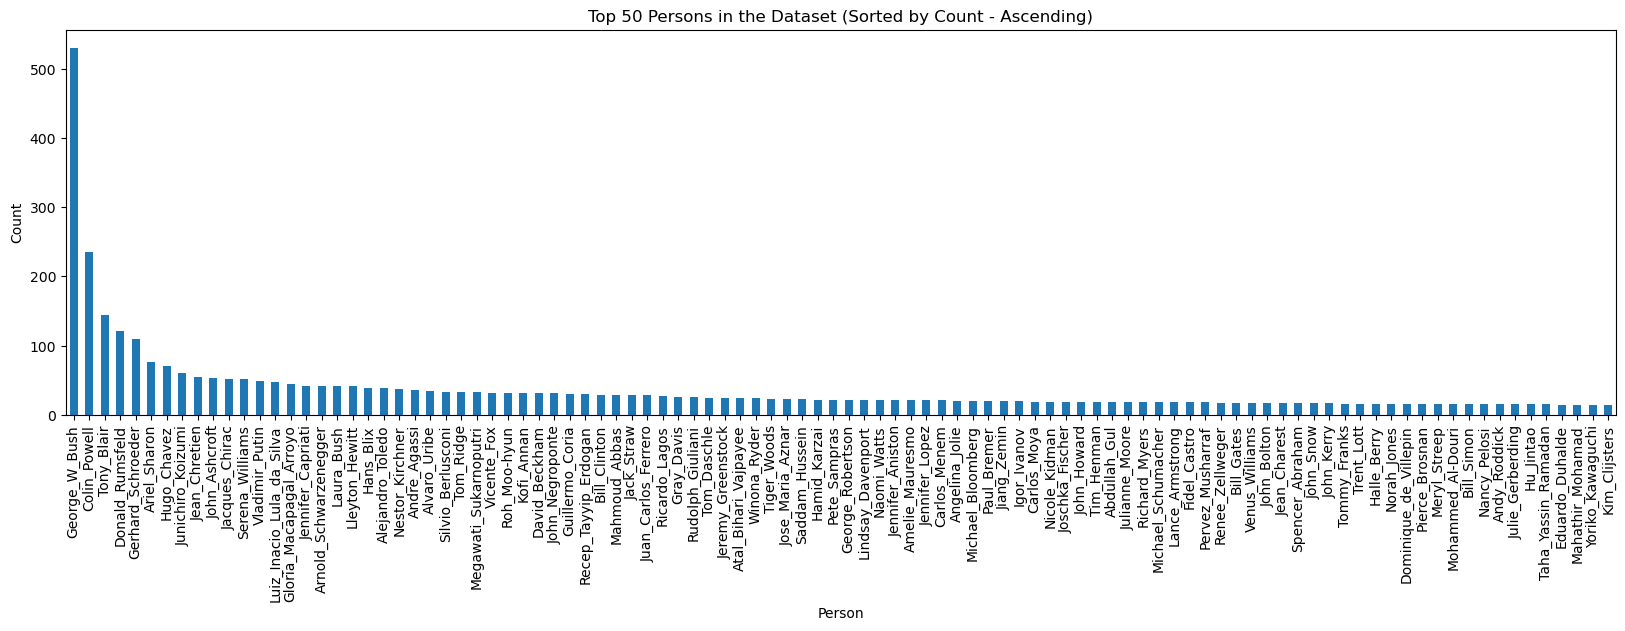

In [53]:
import matplotlib.pyplot as plt

counts = dataset.groupby("person").size().sort_values(ascending=False)[:100]
counts.plot(kind='bar', figsize=(20, 5))

plt.xlabel('Person')
plt.ylabel('Count')
plt.title('Top 50 Persons in the Dataset (Sorted by Count - Ascending)')
plt.xticks(rotation=90)
plt.show()

In [54]:
image_count = dataset['person'].value_counts()

image = image_count[image_count > 10]

print(image)

George_W_Bush            530
Colin_Powell             236
Tony_Blair               144
Donald_Rumsfeld          121
Gerhard_Schroeder        109
                        ... 
Nicanor_Duarte_Frutos     11
Sergey_Lavrov             11
Mike_Weir                 11
John_Paul_II              11
Ann_Veneman               11
Name: person, Length: 143, dtype: int64


In [55]:
dataset['path'][0]

'./Data\\Aaron_Eckhart\\Aaron_Eckhart_0001.jpg'

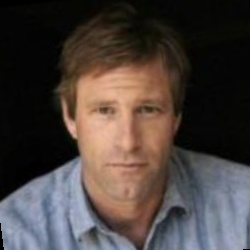

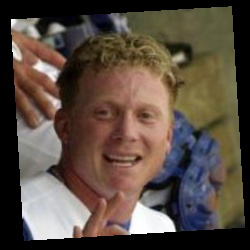

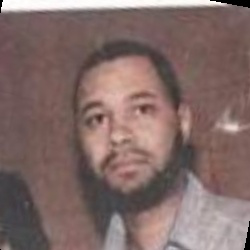

In [56]:
from IPython.display import display
from PIL import Image

for image in dataset['path'][:3]:
    display(Image.open(image))

Aaron_Eckhart


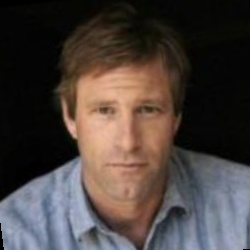

Aaron_Guiel


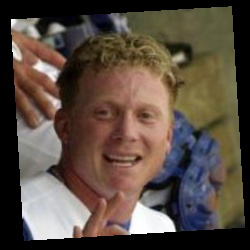

Aaron_Patterson


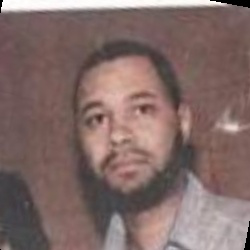

In [57]:
from IPython.display import display
from PIL import Image

for image, name in zip(dataset['path'][:3], dataset['person'][:3]):
    print(name)
    img = Image.open(image)
    display(img)
    img.close()

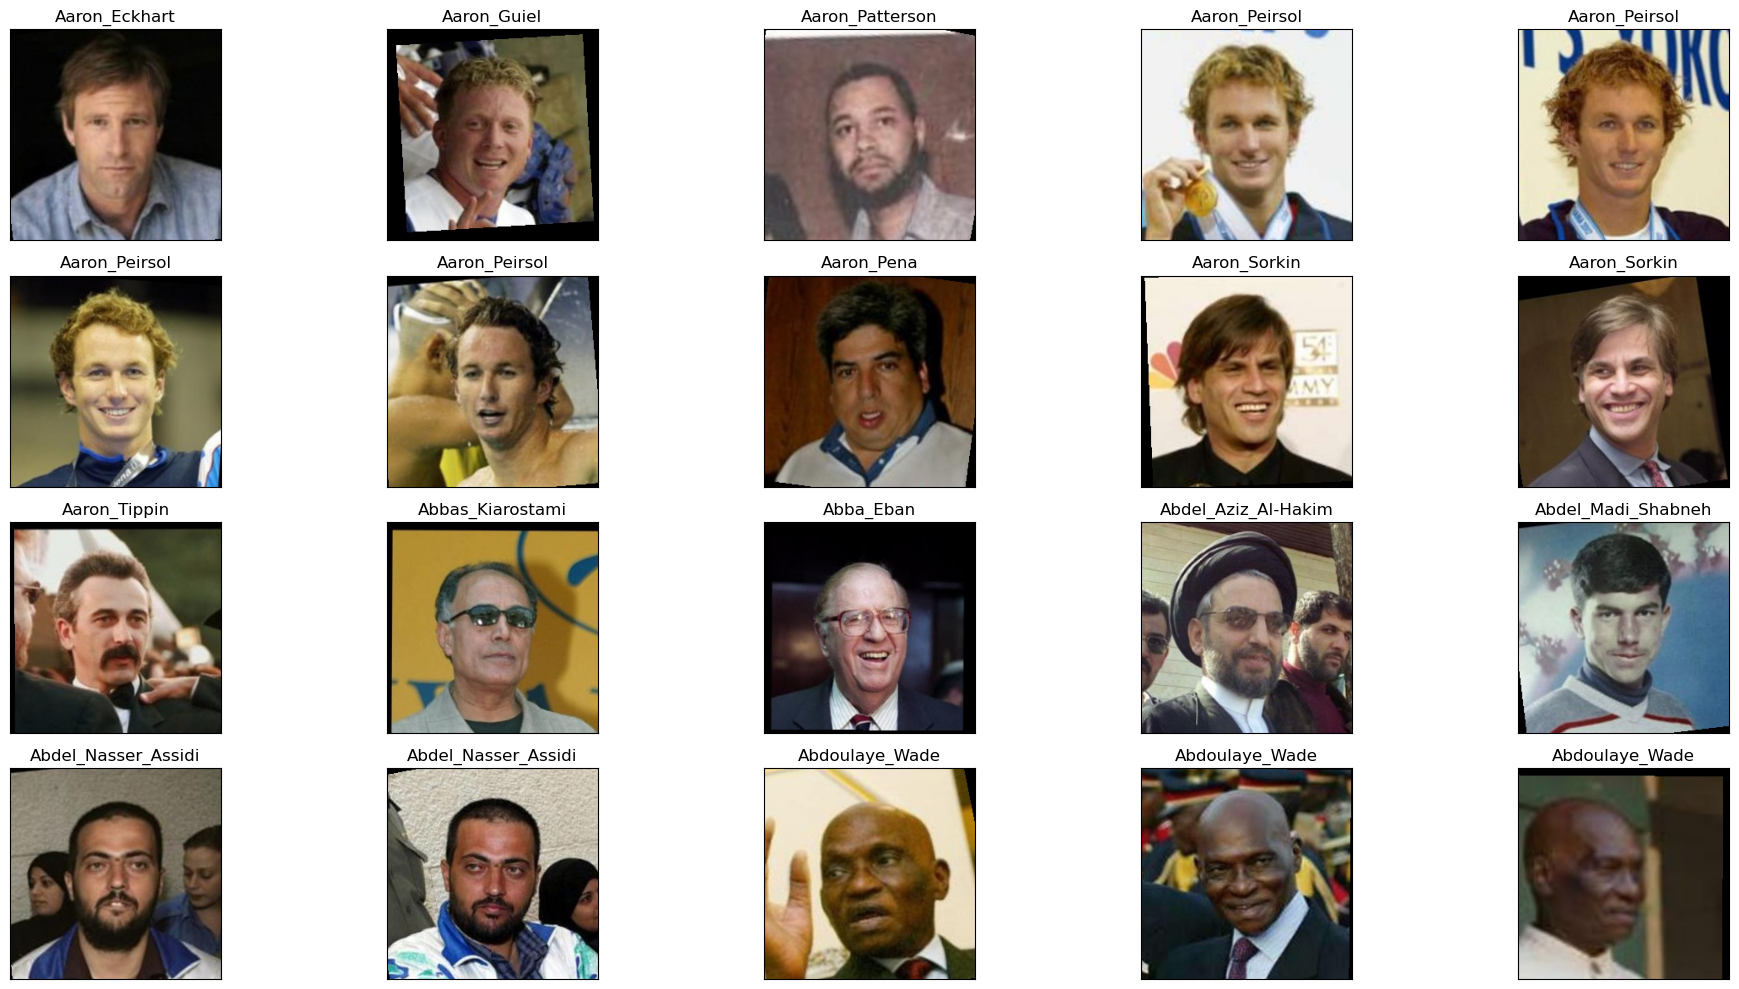

In [58]:
plt.figure(figsize=(20, 10))

for i, path in enumerate(dataset['path'][:20]):
    img = plt.imread(path)
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(dataset['person'].iloc[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

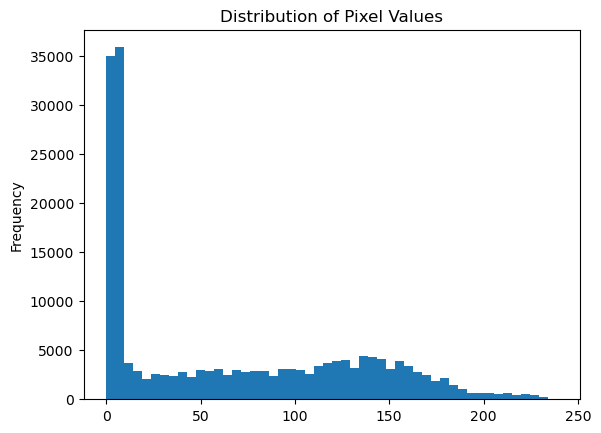

In [59]:
path = dataset['path'][0]
pixels = pd.Series(list(plt.imread(path).flatten()))

pixels.plot(kind='hist', bins=50, title='Distribution of Pixel Values')
plt.show()

In [60]:
image = plt.imread(path)
pixels = image.flatten()

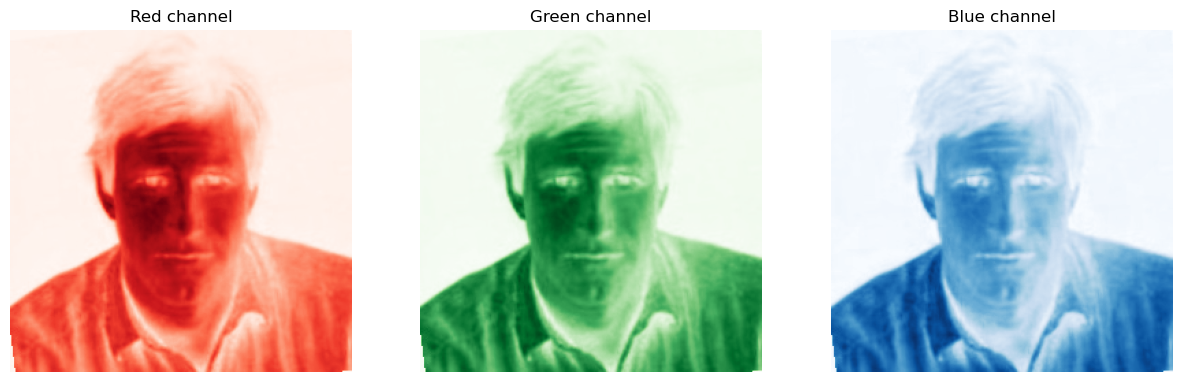

In [61]:
# Display RGB Channels of our image
image = plt.imread(path)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image[:, :, 0], cmap='Reds')
axs[1].imshow(image[:, :, 1], cmap='Greens')
axs[2].imshow(image[:, :, 2], cmap='Blues')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')

plt.show()

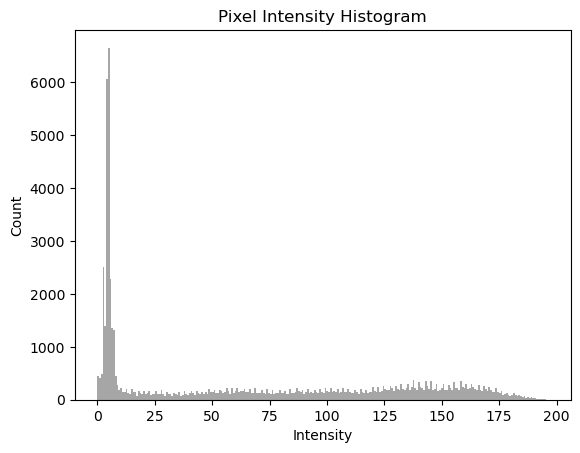

In [62]:
image = plt.imread(dataset['path'][0])

# Convert the image to grayscale if it's in color
if len(image.shape) > 2:
    image = np.mean(image, axis=2)

# Flatten the image to a 1D array
pixels = image.flatten()

# Plot the histogram
plt.hist(pixels, bins=256, color='gray', alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Pixel Intensity Histogram')

# Show the plot
plt.show()

# Preprocessing

In [63]:
df = dataset
df = pd.DataFrame(df)
df.head()

,person,path
0,Aaron_Eckhart,./Data\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
1,Aaron_Guiel,./Data\Aaron_Guiel\Aaron_Guiel_0001.jpg
2,Aaron_Patterson,./Data\Aaron_Patterson\Aaron_Patterson_0001.jpg
3,Aaron_Peirsol,./Data\Aaron_Peirsol\Aaron_Peirsol_0001.jpg
4,Aaron_Peirsol,./Data\Aaron_Peirsol\Aaron_Peirsol_0002.jpg


In [64]:
def clean(image_path, target_size=(100, 100)):
    new_size = (100, 100)  # Desired new size for the resized image
    gray_images = []  # List to store the resulting grayscale images
    no_noise = []

    output = "preprocess_data"
    
    os.makedirs(output, exist_ok=True)

    for path in image_path:
        # Read the image using OpenCV
        image = cv2.imread(path)

        # 1. Resize the image using Pillow
        resized_image = Image.fromarray(image).resize(new_size)

        # 2. Convert the image to grayscale
        gray_image = cv2.cvtColor(np.array(resized_image), cv2.COLOR_BGR2GRAY)

        # 3. Normalization
        norm_image = gray_image / 255

        # 4. Reduce noise
        blur = cv2.GaussianBlur(norm_image, (5, 5), 0)
        no_noise.append(blur)

        # 5. Save the processed image
        file_name = os.path.basename(path)
        output_path = os.path.join(output, file_name)
        cv2.imwrite(output_path, blur)
        print(f"Processed and saved: {output_path}")

In [65]:
clean(df['path'][:5], (100,100))

Processed and saved: preprocess_data\Aaron_Eckhart_0001.jpg
Processed and saved: preprocess_data\Aaron_Guiel_0001.jpg
Processed and saved: preprocess_data\Aaron_Patterson_0001.jpg
Processed and saved: preprocess_data\Aaron_Peirsol_0001.jpg
Processed and saved: preprocess_data\Aaron_Peirsol_0002.jpg


In [66]:
img = plt.imread("preprocess_data/Stefano_Gabbana_0001.jpg")
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'preprocess_data/Stefano_Gabbana_0001.jpg'